In this notebook, I have used the Pima Diabetes dataset. 
This is a classification problem, where we need to predict the target class i.e. diabetic or non-diabetic.  
I first using the Naive Bayes Machine Learning Algorithm to predict the class. 
Further, I have defined a neural network using Pytorch to improve the accuracy score. 

In [ ]:
!pip install -q torch opendatasets
!pip install -q torchsummary sklearn

In [1]:
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
diab=pd.read_csv('pima-indians-diabetes (1) (1).csv')

In [3]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 rows in the dataset and all the columns have not null values. This is good.

In [4]:
diab.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The minimum for all the columns shows 0 which indicates data quality issues. Replacing zero to the median median for Plas, Pres, skin, test and mass columns. Median has been used in this case since the mean may be skewed because of outliers as seen in the min and max values.

In [5]:
diab['skin']=diab['skin'].replace(0,diab['skin'].median())

In [6]:
diab['Plas']=diab['Plas'].replace(0,diab['Plas'].median())

In [7]:
diab['Pres']=diab['Pres'].replace(0,diab['Pres'].median())

In [8]:
diab['test']=diab['test'].replace(0,diab['test'].median())

In [9]:
diab['mass']=diab['mass'].replace(0,diab['mass'].median())

In [10]:
diab.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


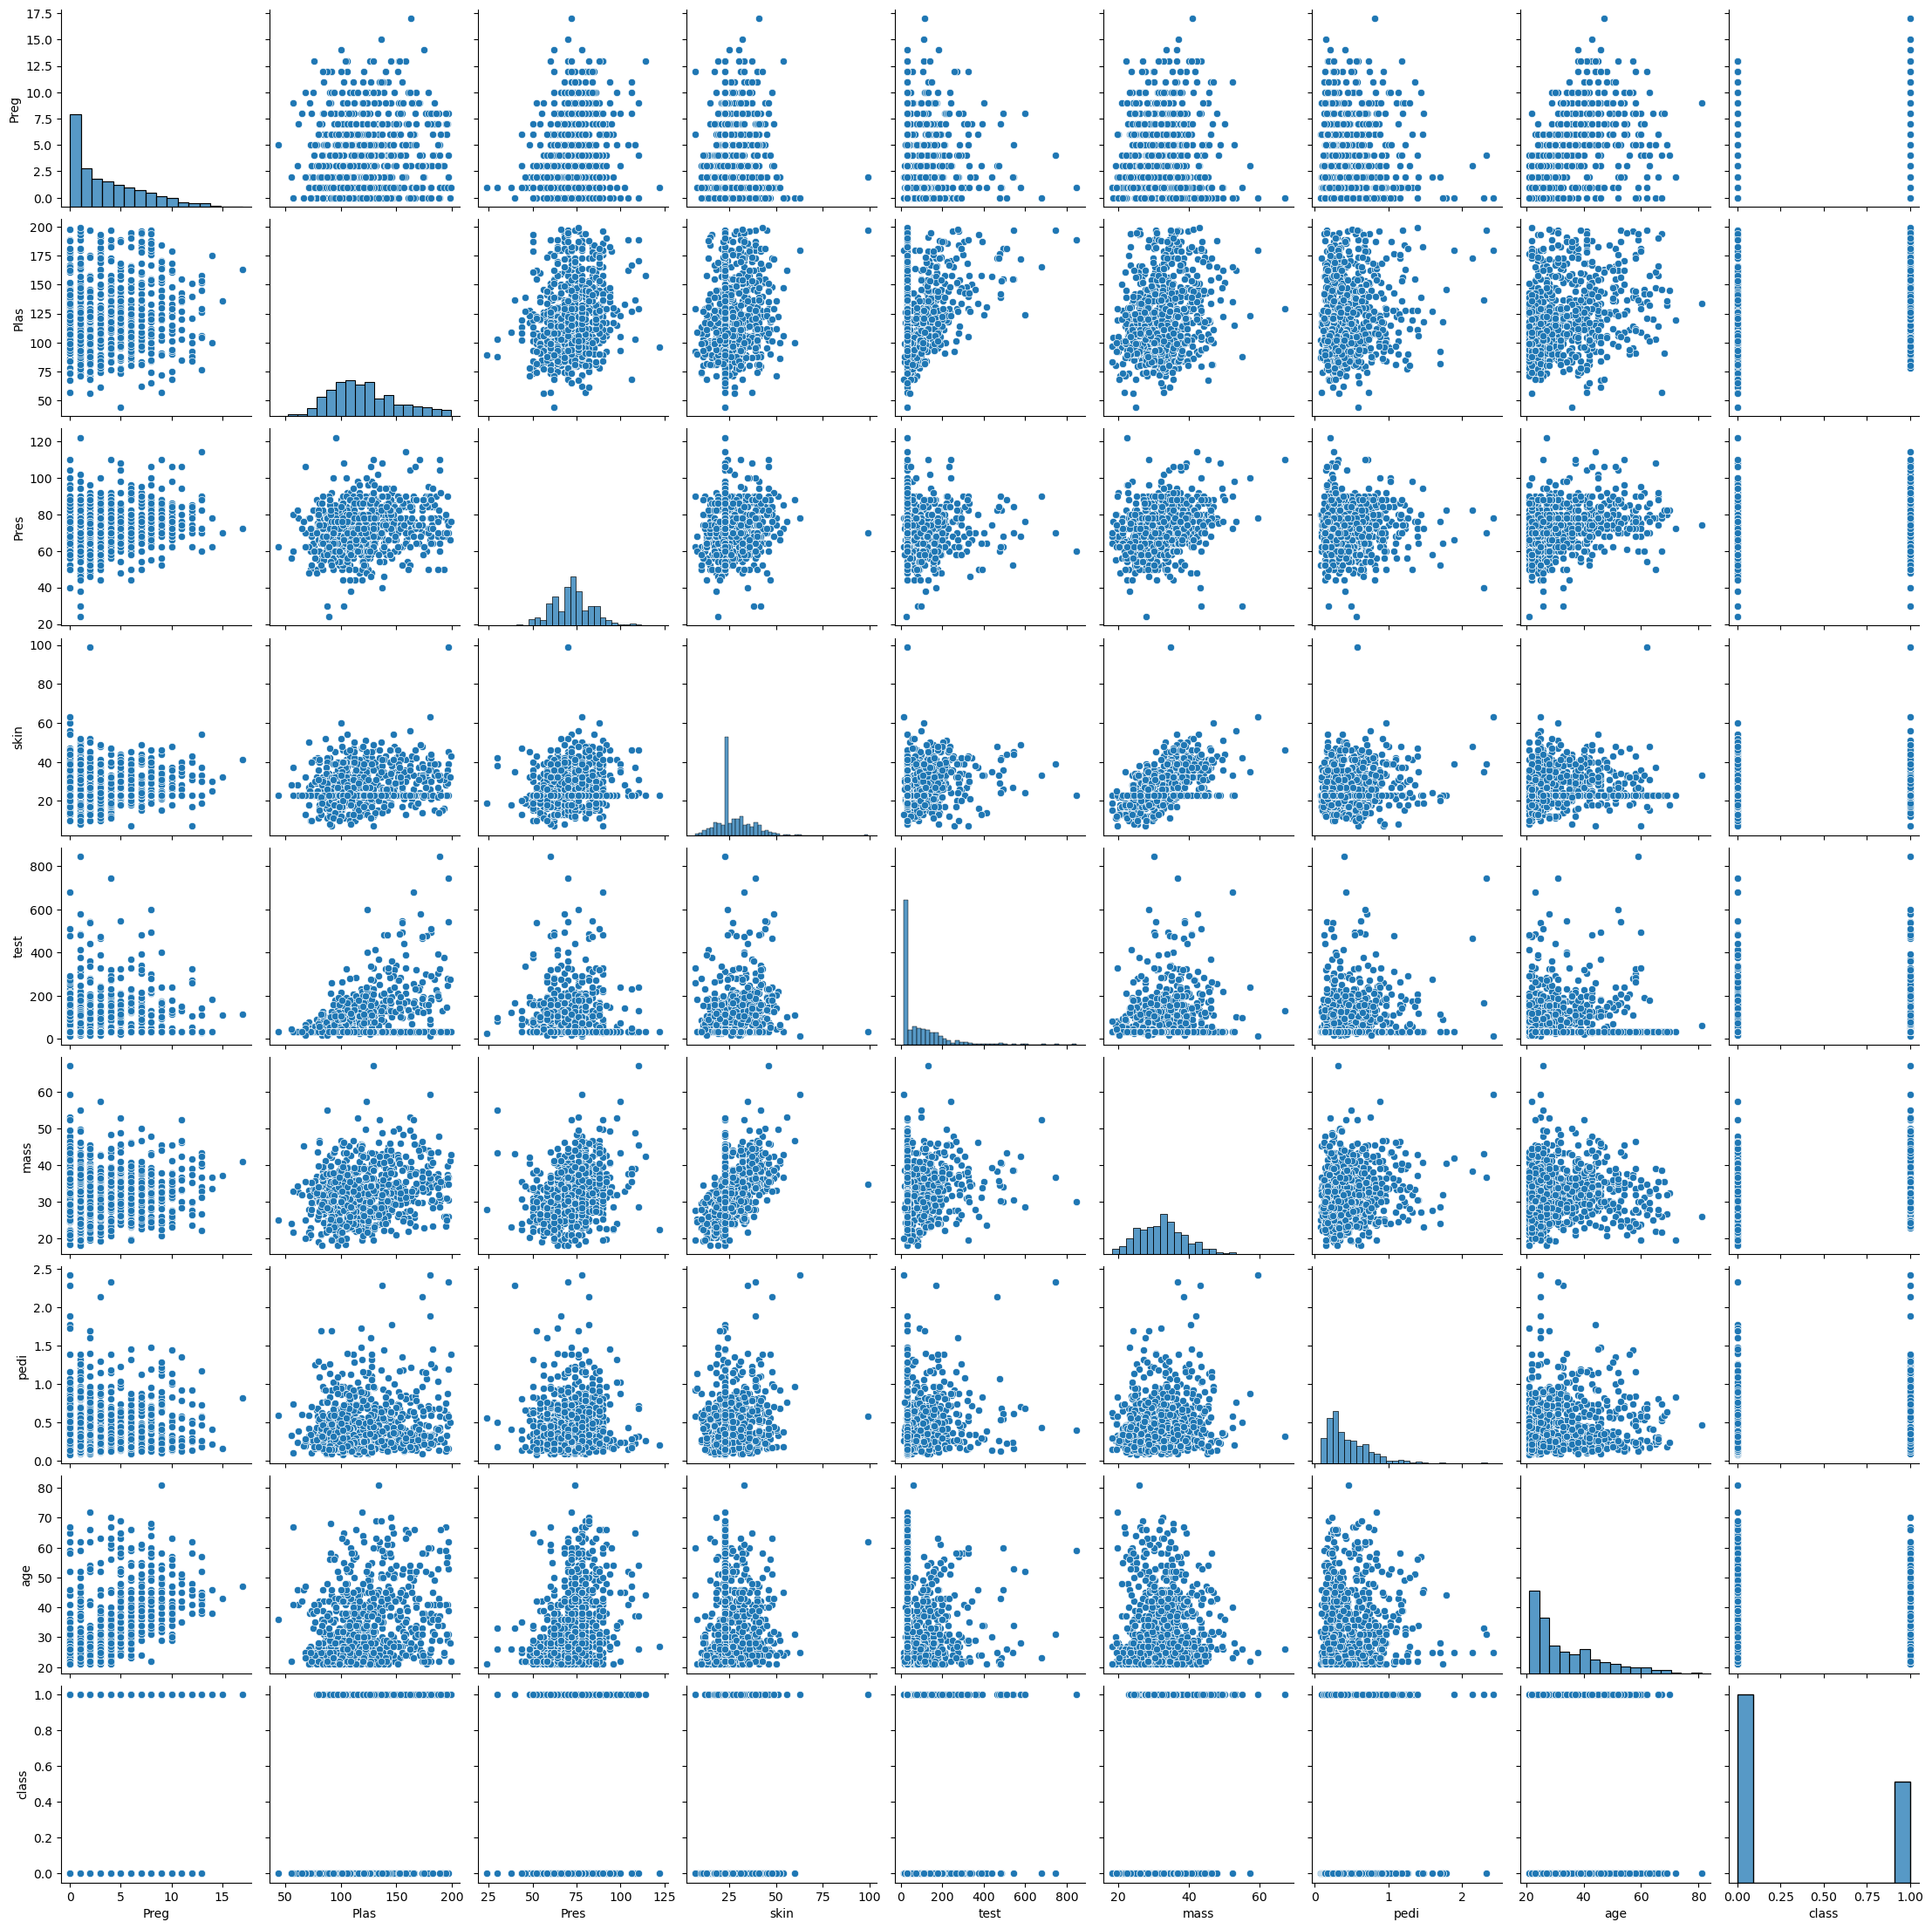

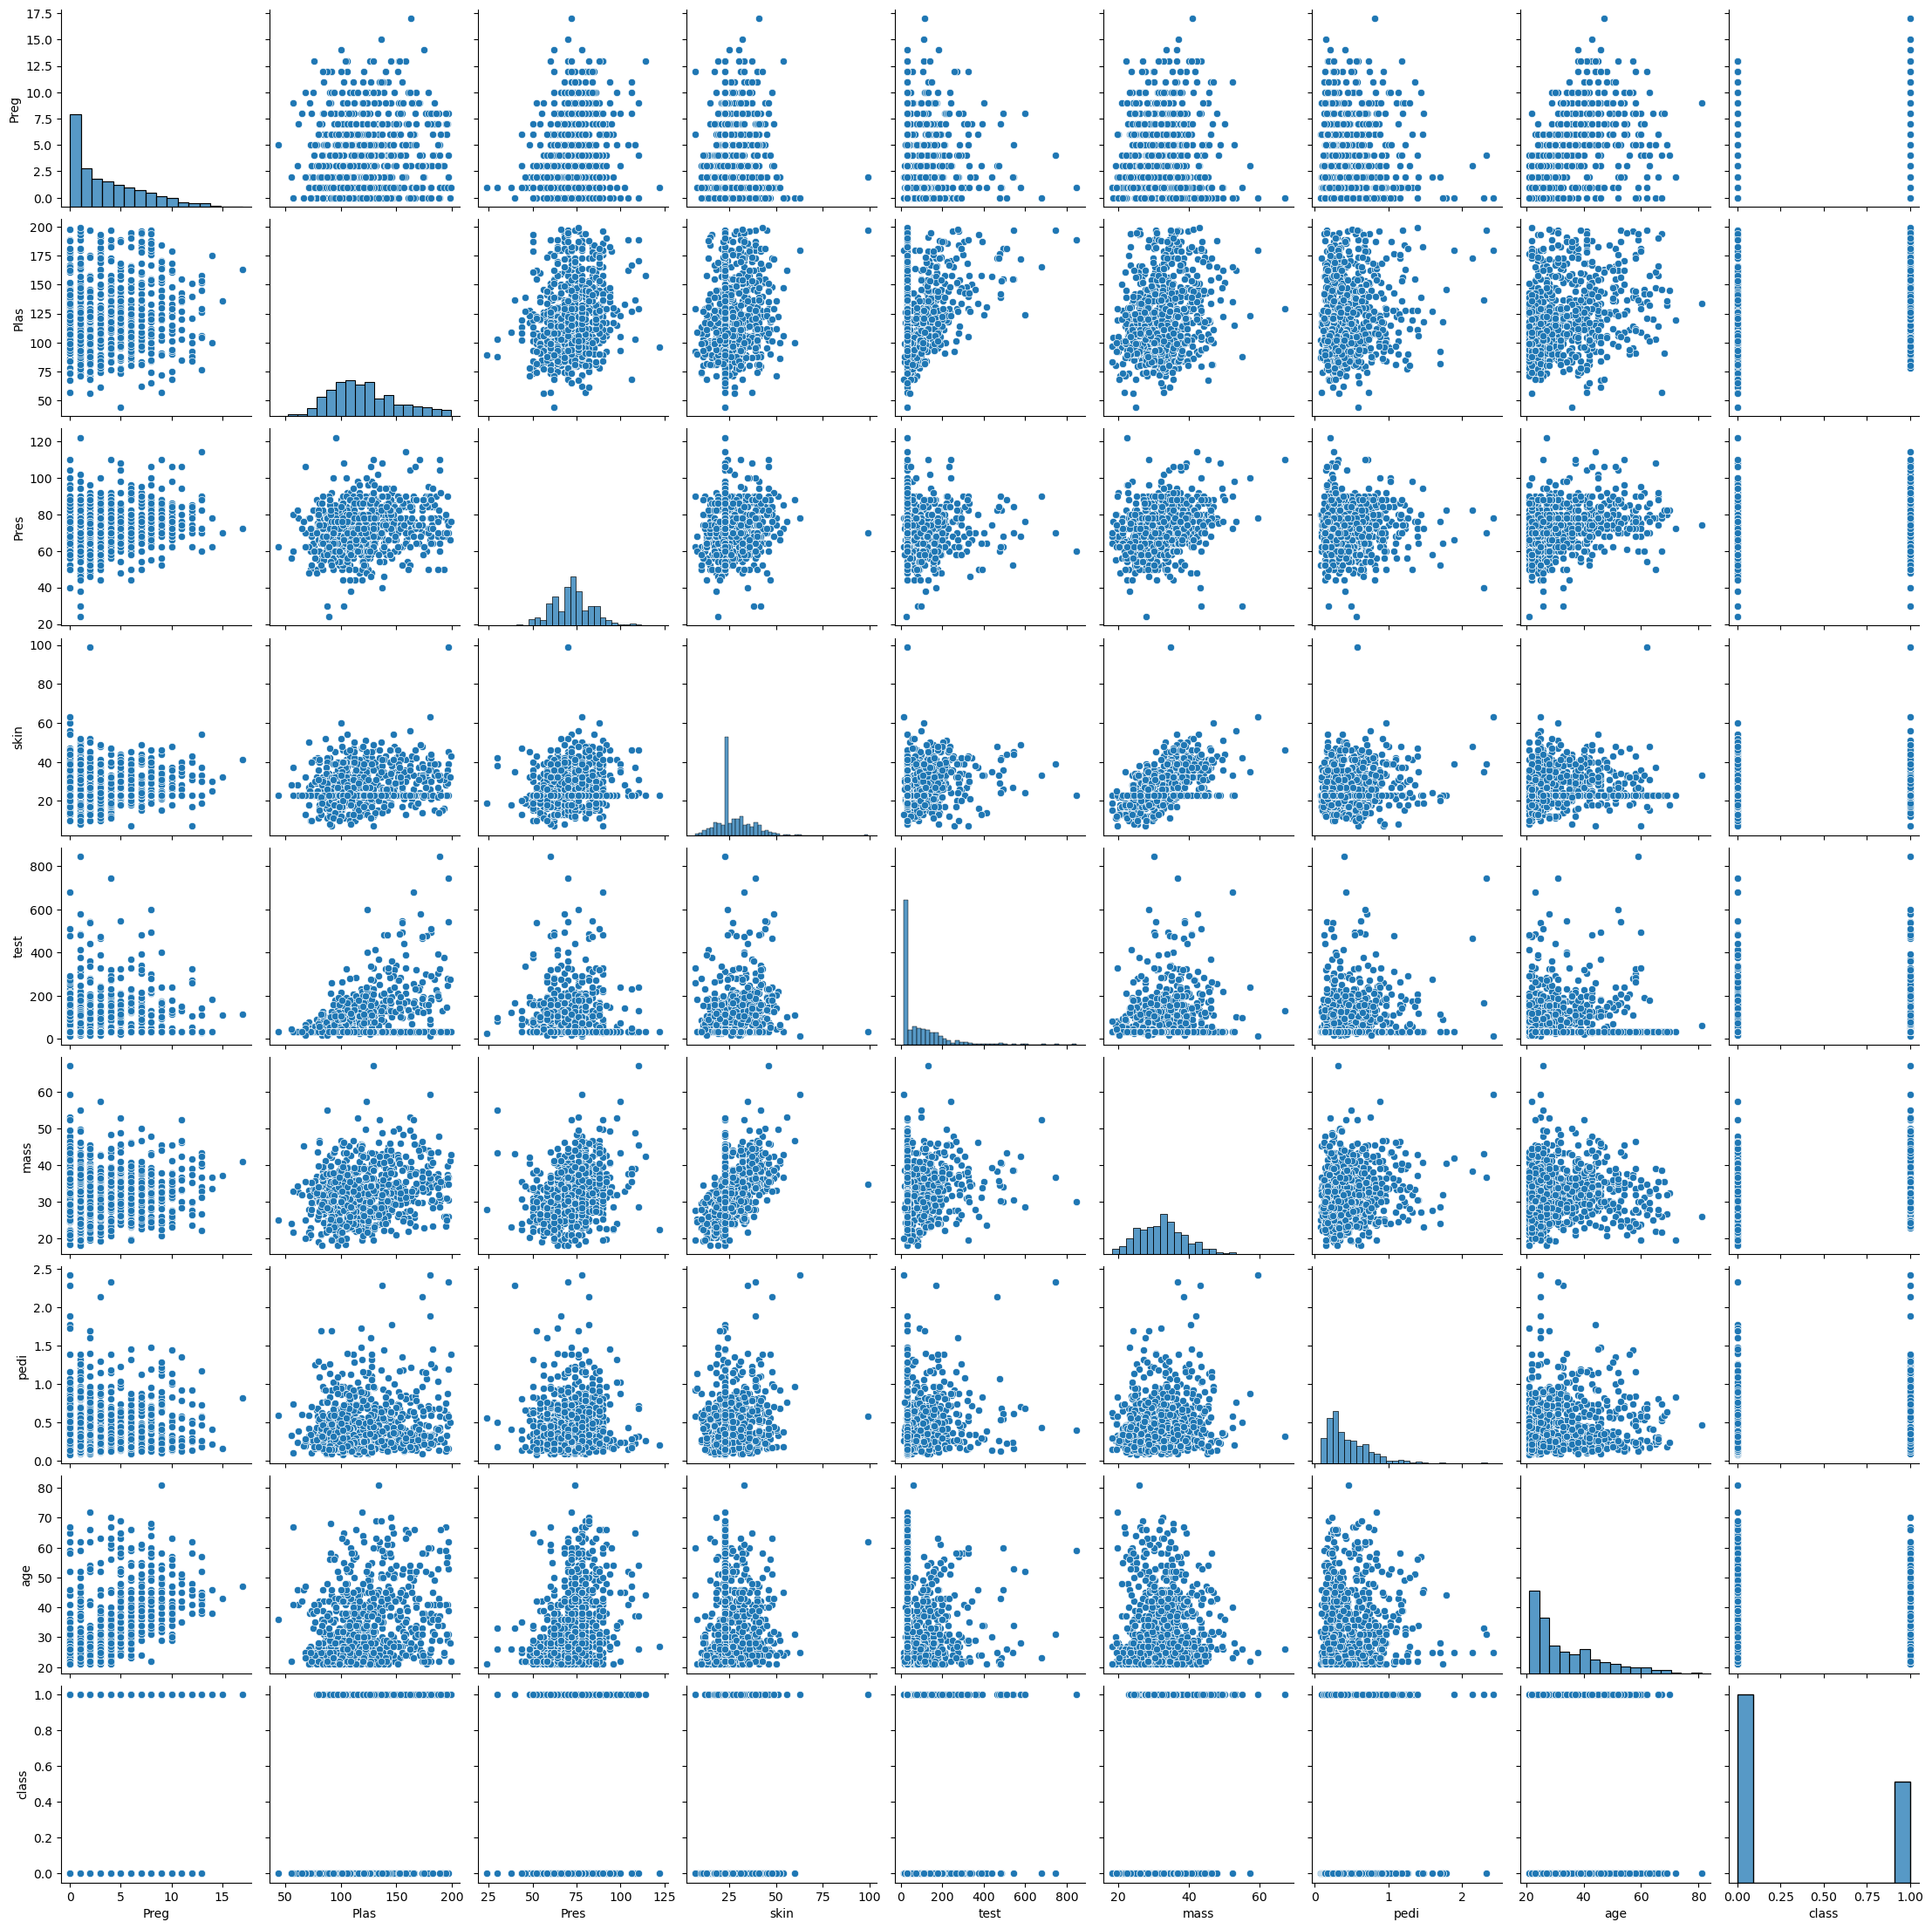

In [57]:
sns.pairplot(diab)
plt.show()

In [12]:
X=diab.iloc[:,0:8]

In [13]:
y=diab.iloc[:,8]

In [63]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

Splitting the dataset into training and test data.

In [64]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,train_size=0.7,random_state=1)
X_test, X_val, y_test, y_val=train_test_split(X_test,y_test,train_size=0.7,random_state=1)

In [65]:
model=GaussianNB()

In [66]:
model.fit(X_train, y_train)

GaussianNB()

In [67]:
y_pred=model.predict(X_test)

In [68]:
metrics.accuracy_score(y_test,y_pred,normalize=True)

0.7701863354037267

The accuracy score of the model is 77%.

## Define a Neural Network using Pytorch

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [40]:
X_original=X.copy()
y_original=y.copy()

In [39]:
X_std[0]

array([ 0.63994726,  0.86604475, -0.03198993,  0.83111367, -0.60820096,
        0.16724016,  0.46849198,  1.4259954 ])

In [41]:
y=np.array(y)

In [45]:
X_train, X_test, y_train, y_test=train_test_split(X_std,y,train_size=0.7,random_state=1)
X_test, X_val, y_test, y_val=train_test_split(X_test,y_test,train_size=0.5,random_state=1)

In [46]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(537, 8)
(116, 8)
(115, 8)


In [47]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [48]:
train_dataloader=DataLoader(training_data, batch_size=8, shuffle=True)
val_dataloader=DataLoader(validation_data, batch_size=8, shuffle=True)
test_dataloader=DataLoader(testing_data, batch_size=8, shuffle=True)

In [50]:
HIDDEN_NEURONS1=8
HIDDEN_NEURONS2=4

class myModel(nn.Module):
  def __init__(self):
    super(myModel, self).__init__()
    self.InputLayer=nn.Linear(X.shape[1], HIDDEN_NEURONS1)
    self.HiddenLayer1=nn.Linear(HIDDEN_NEURONS1, HIDDEN_NEURONS2)
    self.relu1=nn.ReLU()
    self.HiddenLayer2=nn.Linear(HIDDEN_NEURONS2, 1)
    self.OutputLayer=nn.Sigmoid()

  def forward(self, x):
    x=self.InputLayer(x)
    x=self.HiddenLayer1(x)
    x=self.relu1(x)
    x=self.HiddenLayer2(x)
    x=self.OutputLayer(x)
    return x

model=myModel().to(device)

In [51]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              72
            Linear-2                    [-1, 4]              36
              ReLU-3                    [-1, 4]               0
            Linear-4                    [-1, 1]               5
           Sigmoid-5                    [-1, 1]               0
Total params: 113
Trainable params: 113
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [52]:
criterion=nn.BCELoss()
optimizer=Adam(model.parameters(), lr=1e-3)

In [53]:
total_train_acc_plot=[]
total_val_acc_plot=[]
total_train_loss_plot=[]
total_val_loss_plot=[]

epochs=10
for epoch in range(epochs):
  total_train_loss=0
  total_train_acc=0

  for data in train_dataloader:
    inputs, labels = data
    prediction=model(inputs).squeeze(1)
    #print('Pred', (prediction).round())
    #print('Actual',labels)
    batch_loss=criterion(prediction, labels)
    #print('batch_loss',batch_loss.item())
    total_train_loss+=batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    #print('acc',acc)
    total_train_acc += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    total_val_loss=0
    total_val_acc=0
    for data in val_dataloader:
      inputs, labels = data
      prediction=model(inputs).squeeze(1)
      batch_loss=criterion(prediction, labels)

      total_val_loss+=batch_loss.item()

      acc = ((prediction).round() == labels).sum().item()

      total_val_acc += acc

  total_train_acc_plot.append(round((total_train_acc/(training_data.__len__())*100),4))
  total_val_acc_plot.append(round((total_val_acc/(validation_data.__len__())*100),4))
  total_train_loss_plot.append(round(total_train_loss/1000, 4))
  total_val_loss_plot.append(round(total_val_loss/1000, 4))

  print(f"""Epoch No: {epoch+1} Training Accuracy: {(total_train_acc/(training_data.__len__())*100):.4f} Validation Accuracy: {(total_val_acc/(validation_data.__len__())*100):.4f} Training Loss: {total_train_loss/1000:.4f} Validation Loss:  {total_val_loss/1000:.4f}""")
  print("*"*50)
  """print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(training_data.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_data.__len__())*100):.4f}''')
  print("="*50)"""

Epoch No: 1 Training Accuracy: 37.4302 Validation Accuracy: 61.2069 Training Loss: 0.0498 Validation Loss:  0.0100
**************************************************
Epoch No: 2 Training Accuracy: 66.4804 Validation Accuracy: 75.0000 Training Loss: 0.0431 Validation Loss:  0.0084
**************************************************
Epoch No: 3 Training Accuracy: 72.4395 Validation Accuracy: 81.0345 Training Loss: 0.0382 Validation Loss:  0.0078
**************************************************
Epoch No: 4 Training Accuracy: 74.4879 Validation Accuracy: 80.1724 Training Loss: 0.0352 Validation Loss:  0.0074
**************************************************
Epoch No: 5 Training Accuracy: 74.8603 Validation Accuracy: 79.3103 Training Loss: 0.0345 Validation Loss:  0.0073
**************************************************
Epoch No: 6 Training Accuracy: 74.3017 Validation Accuracy: 77.5862 Training Loss: 0.0338 Validation Loss:  0.0073
**************************************************
Epoc

In [54]:
with torch.no_grad():
  total_test_loss=0
  total_test_acc=0
  for data in test_dataloader:
    inputs, labels = data
    prediction=model(inputs).squeeze(1)
    batch_loss=criterion(prediction, labels)

    total_val_loss+=batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_test_acc += acc

print(f"Test Accuracy: {(total_test_acc/(testing_data.__len__())*100):.4f}")

Test Accuracy: 81.7391


The accuracy score has shown considerable improvement, a jump from 77% to approx 82% using neural network.

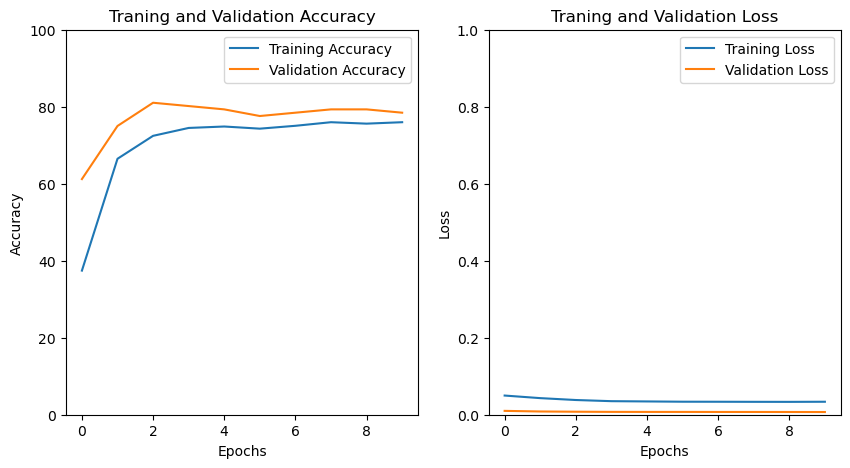

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axs[0].plot(total_train_acc_plot,label='Training Accuracy')
axs[0].plot(total_val_acc_plot,label='Validation Accuracy')
axs[0].set_title('Traning and Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].set_ylim(0,100)

axs[1].plot(total_train_loss_plot,label='Training Loss')
axs[1].plot(total_val_loss_plot,label='Validation Loss')
axs[1].set_title('Traning and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].set_ylim(0,1)
plt.show()
